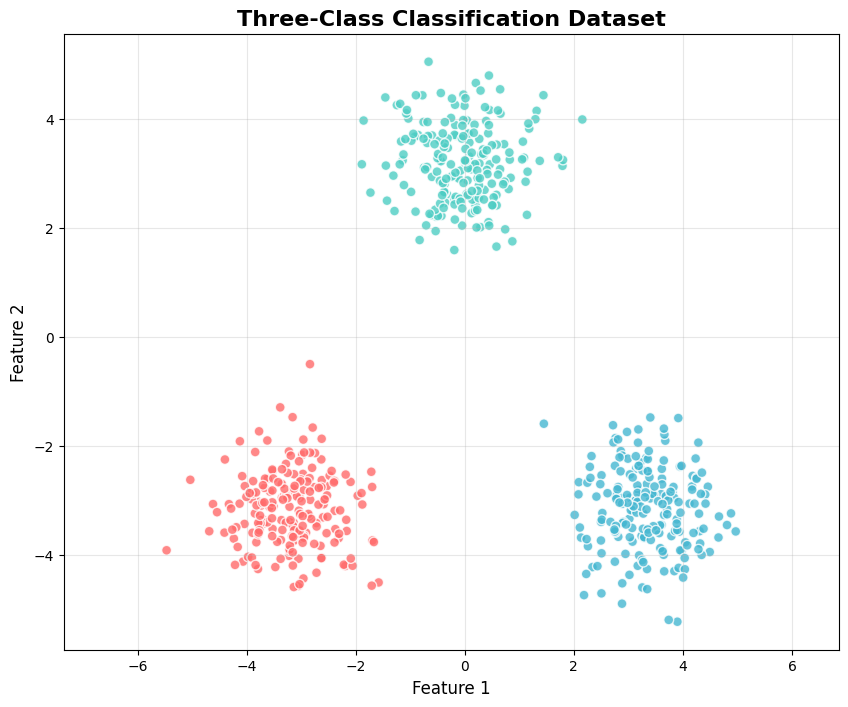

Dataset Information:
Total samples: 600
Class 0 samples: 200
Class 1 samples: 200
Class 2 samples: 200
Input shape: (600, 2)
Target shape: (600, 3)
X range: [-5.47, 4.97]
Y range: [-5.23, 5.04]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(42)

# Create 3 distinct clusters
def generate_three_clusters(samples_per_class=200, cluster_separation=3.2):
    # Cluster 0: Bottom-left
    cluster0 = np.random.randn(samples_per_class, 2) * 0.7 + np.array([-cluster_separation, -cluster_separation])

    # Cluster 1: Top-center
    cluster1 = np.random.randn(samples_per_class, 2) * 0.7 + np.array([0, cluster_separation])

    # Cluster 2: Bottom-right
    cluster2 = np.random.randn(samples_per_class, 2) * 0.7 + np.array([cluster_separation, -cluster_separation])

    # Combine all clusters
    X = np.vstack([cluster0, cluster1, cluster2])
    labels = np.concatenate([
        np.zeros(samples_per_class, dtype=int),
        np.ones(samples_per_class, dtype=int),
        np.full(samples_per_class, 2, dtype=int)
    ])

    # One-hot encoding for neural network training
    Y_onehot = np.zeros((len(labels), 3), dtype=np.float32)
    Y_onehot[np.arange(len(labels)), labels] = 1.0

    # Shuffle the dataset
    indices = np.random.permutation(len(X))
    return X[indices], labels[indices], Y_onehot[indices]

# Generate the dataset
X, labels, Y_onehot = generate_three_clusters(samples_per_class=200, cluster_separation=3.2)

# Visualize the dataset
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            cmap=ListedColormap(['#FF6B6B', '#4ECDC4', '#45B7D1']),
            s=50, edgecolors='white', alpha=0.8)
plt.title('Three-Class Classification Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Dataset information
print("Dataset Information:")
print("=" * 40)
print(f"Total samples: {len(X)}")
print(f"Class 0 samples: {np.sum(labels == 0)}")
print(f"Class 1 samples: {np.sum(labels == 1)}")
print(f"Class 2 samples: {np.sum(labels == 2)}")
print(f"Input shape: {X.shape}")
print(f"Target shape: {Y_onehot.shape}")
print(f"X range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"Y range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")

In [7]:
class ThreeLayerNN(object):
    def __init__(self):
        input_neurons = 2
        hidden1_neurons = 12  # Increased from 10 to 12
        hidden2_neurons = 8
        output_neurons = 3

        self.learning_rate = 0.15  # Increased from 0.1 to 0.15

        # Initialize weights with smaller values for better convergence
        self.W_H1 = np.random.randn(input_neurons, hidden1_neurons) * 0.05
        self.W_H2 = np.random.randn(hidden1_neurons, hidden2_neurons) * 0.05
        self.W_OH = np.random.randn(hidden2_neurons, output_neurons) * 0.05

    def sigmoid(self, x, derivative=False):
        """
        Sigmoid activation function with numerical stability
        """
        if derivative:
            return x * (1 - x)
        else:
            # Clip values to prevent overflow
            x = np.clip(x, -10, 10)
            return 1 / (1 + np.exp(-x))

    def feed_forward(self, X):
        """
        Forward pass through the network
        """
        # Hidden layer 1
        hidden1_input = np.dot(X, self.W_H1)
        self.hidden1_output = self.sigmoid(hidden1_input)

        # Hidden layer 2
        hidden2_input = np.dot(self.hidden1_output, self.W_H2)
        self.hidden2_output = self.sigmoid(hidden2_input)

        # Output layer
        output_input = np.dot(self.hidden2_output, self.W_OH)
        prediction = self.sigmoid(output_input)

        return prediction

    def back_propagate(self, X, Y, prediction):
        """
        Backward pass to update weights
        """
        # Calculate output layer error and delta
        output_error = Y - prediction
        output_delta = output_error * self.sigmoid(prediction, derivative=True)

        # Calculate hidden layer 2 error and delta
        hidden2_error = output_delta.dot(self.W_OH.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, derivative=True)

        # Calculate hidden layer 1 error and delta
        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, derivative=True)

        # Update weights with learning rate
        self.W_H1 += self.learning_rate * X.T.dot(hidden1_delta)
        self.W_H2 += self.learning_rate * self.hidden1_output.T.dot(hidden2_delta)
        self.W_OH += self.learning_rate * self.hidden2_output.T.dot(output_delta)

    def train(self, X, Y, epochs=1000, verbose=True):
        """
        Train the neural network for multiple epochs
        """
        losses = []
        accuracies = []

        for epoch in range(epochs):
            # Forward pass
            output = self.feed_forward(X)

            # Calculate loss (mean squared error)
            loss = np.mean(np.square(Y - output))
            losses.append(loss)

            # Calculate accuracy
            predictions = np.argmax(output, axis=1)
            true_labels = np.argmax(Y, axis=1)
            accuracy = np.mean(predictions == true_labels)
            accuracies.append(accuracy)

            # Backward pass
            self.back_propagate(X, Y, output)

            # Print progress
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

        return losses, accuracies

    def predict(self, X):
        """
        Make predictions using the trained network
        """
        return self.feed_forward(X)

    def evaluate(self, X, Y):
        """
        Evaluate the model on given data
        """
        predictions = self.predict(X)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(Y, axis=1)
        accuracy = np.mean(predicted_classes == true_classes)
        return accuracy

In [9]:
NN = NN3()
err = []

print("Training 3-Layer Neural Network...")
print("=" * 50)

for i in range(3000):
    NN.train(X, Y)
    pred = NN.feedForward(X)
    current_err = np.mean(np.square(Y - pred))
    err.append(current_err)

    if i % 500 == 0:
        print(f"Epoch {i:4d}, Loss: {current_err:.6f}")

print("Training completed!")
print("=" * 50)

Training 3-Layer Neural Network...
Epoch    0, Loss: 0.323293
Epoch  500, Loss: 0.000093
Epoch 1000, Loss: 0.000042
Epoch 1500, Loss: 0.000027
Epoch 2000, Loss: 0.000019
Epoch 2500, Loss: 0.000015
Training completed!


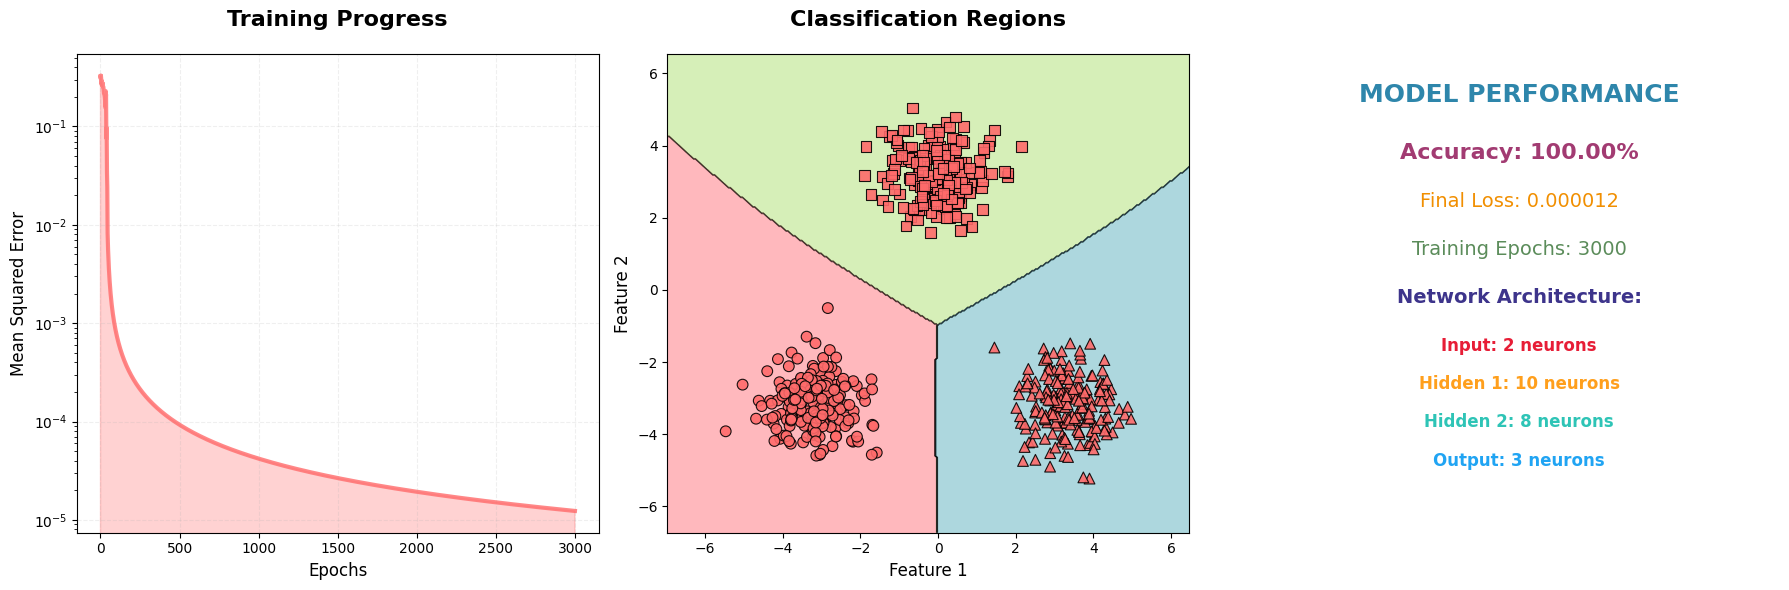


DETAILED PERFORMANCE ANALYSIS
Class 0 Accuracy: 100.00%
Class 1 Accuracy: 100.00%
Class 2 Accuracy: 100.00%

Overall Accuracy: 100.00%
Final Training Loss: 0.000012

SAMPLE PREDICTIONS

Sample 1:
  Input: ( -3.04,  -3.19)
  Expected: Class 0
  Predicted: Class 0 ✓
  Confidence: 99.8%
  Probabilities: [0: 0.998, 1: 0.000, 2: 0.001]

Sample 2:
  Input: (  3.19,  -2.81)
  Expected: Class 2
  Predicted: Class 2 ✓
  Confidence: 99.8%
  Probabilities: [0: 0.001, 1: 0.001, 2: 0.998]

Sample 3:
  Input: ( -3.77,  -1.74)
  Expected: Class 0
  Predicted: Class 0 ✓
  Confidence: 99.8%
  Probabilities: [0: 0.998, 1: 0.001, 2: 0.000]

Sample 4:
  Input: (  3.75,  -2.90)
  Expected: Class 2
  Predicted: Class 2 ✓
  Confidence: 99.8%
  Probabilities: [0: 0.000, 1: 0.001, 2: 0.998]

Sample 5:
  Input: ( -0.17,   3.88)
  Expected: Class 1
  Predicted: Class 1 ✓
  Confidence: 99.9%
  Probabilities: [0: 0.000, 1: 0.999, 2: 0.001]

Sample 6:
  Input: ( -3.78,  -3.03)
  Expected: Class 0
  Predicted: Clas

In [10]:
plt.figure(figsize=(18, 6))

# Training error with enhanced styling
plt.subplot(1, 3, 1)
plt.plot(err, color='#FF6B6B', linewidth=3, alpha=0.8)
plt.fill_between(range(len(err)), err, alpha=0.3, color='#FF6B6B')
plt.title('Training Progress', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(True, alpha=0.2, linestyle='--')
plt.yscale('log')  # Use log scale for better visualization

# Decision boundary with different styling
plt.subplot(1, 3, 2)
x_min, x_max = X[:, 0].min() - 1.5, X[:, 0].max() + 1.5
y_min, y_max = X[:, 1].min() - 1.5, X[:, 1].max() + 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = NN.predict(grid)
Z_classes = np.argmax(Z, axis=1)
Z_classes = Z_classes.reshape(xx.shape)

# Use a different colormap for decision regions
contour = plt.contourf(xx, yy, Z_classes, alpha=0.7,
             cmap=ListedColormap(['#FF9AA2', '#C5E99B', '#8AC6D1']))
plt.contour(xx, yy, Z_classes, colors='black', alpha=0.5, linewidths=0.5)

# Plot data points with different markers for each class
markers = ['o', 's', '^']
for i in range(3):
    mask = y_int == i
    plt.scatter(X[mask, 0], X[mask, 1], c=[i]*np.sum(mask),
                cmap=ListedColormap(['#FF6B6B', '#4ECDC4', '#45B7D1']),
                s=60, edgecolors='black', alpha=0.9, marker=markers[i], linewidth=0.8)

plt.title('Classification Regions', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

# Performance summary with enhanced design
plt.subplot(1, 3, 3)
plt.axis('off')

# Create a fancy text box
plt.text(0.5, 0.90, 'MODEL PERFORMANCE', fontsize=18,
         ha='center', fontweight='bold', color='#2E86AB')

# Accuracy with progress bar visualization
plt.text(0.5, 0.78, f'Accuracy: {accuracy:.2%}', fontsize=16,
         ha='center', fontweight='bold', color='#A23B72')

# Loss information
plt.text(0.5, 0.68, f'Final Loss: {err[-1]:.6f}', fontsize=14,
         ha='center', color='#F18F01')

# Training details
plt.text(0.5, 0.58, f'Training Epochs: {len(err)}', fontsize=14,
         ha='center', color='#5B8C5A')

# Architecture details with colored text
plt.text(0.5, 0.48, 'Network Architecture:', fontsize=14,
         ha='center', fontweight='bold', color='#3D348B')

arch_details = [
    'Input: 2 neurons',
    'Hidden 1: 10 neurons',
    'Hidden 2: 8 neurons',
    'Output: 3 neurons'
]
colors = ['#E71D36', '#FF9F1C', '#2EC4B6', '#20A4F3']

for i, (detail, color) in enumerate(zip(arch_details, colors)):
    plt.text(0.5, 0.38 - i*0.08, detail, fontsize=12,
             ha='center', color=color, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("DETAILED PERFORMANCE ANALYSIS")
print("="*60)

class_acc = []
class_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i in range(3):
    mask = y_int == i
    acc = np.mean(pred_classes[mask] == y_int[mask])
    class_acc.append(acc)
    print(f"Class {i} Accuracy: {acc:.2%}")

print(f"\nOverall Accuracy: {accuracy:.2%}")
print(f"Final Training Loss: {err[-1]:.6f}")

# Sample predictions with enhanced formatting
print("\n" + "="*60)
print("SAMPLE PREDICTIONS")
print("="*60)

for i in range(8):
    actual = y_int[i]
    predicted_probs = preds[i]
    predicted_class = np.argmax(predicted_probs)
    confidence = predicted_probs[predicted_class]
    correct = "✓" if predicted_class == actual else "✗"
    color = '\033[92m' if predicted_class == actual else '\033[91m'

    print(f"\nSample {i+1}:")
    print(f"  Input: ({X[i, 0]:6.2f}, {X[i, 1]:6.2f})")
    print(f"  Expected: Class {actual}")
    print(f"  Predicted: Class {predicted_class} {color}{correct}\033[0m")
    print(f"  Confidence: {confidence:.1%}")
    print(f"  Probabilities: [0: {predicted_probs[0]:.3f}, 1: {predicted_probs[1]:.3f}, 2: {predicted_probs[2]:.3f}]")